In [5]:
using GraphViz

using StockFlow
using StockFlow.Syntax

# 1. Define SEIR Stock and Flow model

In [21]:
seir = @stock_and_flow begin
    :stocks
    S
    E
    I
    R

    :dynamic_variables
    v_birth = μ * N

    v_incid₁ = β * S
    v_incid₂ = v_incid₁ * I
    v_incid₃ = v_incid₂ / N

    v_deathS = S * δ
    v_inf = E / tlatent
    v_deathE = E * δ
    v_rec = I / trecovery
    v_deathI = I * δ
    v_deathR = R * δ

    :parameters
    μ
    δ
    β
    tlatent
    trecovery

    :flows
    CLOUD => birth(v_birth) => S
    S => incid(v_incid₃) => E
    S => deathS(v_deathS) => CLOUD
    E => inf(v_inf) => I
    E => deathE(v_deathE) => CLOUD
    I => rec(v_rec) => R
    I => deathI(v_deathI) => CLOUD
    R => deathR(v_deathR) => CLOUD

    :sums
    N = [S, E, I, R]

end

StockAndFlowF with elements S = 1:4, SV = 1:1, LS = 1:4, F = 1:8, I = 1:4, O = 1:7, V = 1:10, LV = 1:8, LSV = 1:2, P = 1:5, LVV = 1:2, LPV = 1:8
┌───┬───────┐
│ S │ sname │
├───┼───────┤
│ 1 │     S │
│ 2 │     E │
│ 3 │     I │
│ 4 │     R │
└───┴───────┘
┌────┬────────┐
│ SV │ svname │
├────┼────────┤
│  1 │      N │
└────┴────────┘
┌────┬─────┬──────┐
│ LS │ lss │ lssv │
├────┼─────┼──────┤
│  1 │   1 │    1 │
│  2 │   2 │    1 │
│  3 │   3 │    1 │
│  4 │   4 │    1 │
└────┴─────┴──────┘
┌───┬────┬────────┐
│ F │ fv │  fname │
├───┼────┼────────┤
│ 1 │  1 │  birth │
│ 2 │  4 │  incid │
│ 3 │  5 │ deathS │
│ 4 │  6 │    inf │
│ 5 │  7 │ deathE │
│ 6 │  8 │    rec │
│ 7 │  9 │ deathI │
│ 8 │ 10 │ deathR │
└───┴────┴────────┘
┌───┬─────┬────┐
│ I │ ifn │ is │
├───┼─────┼────┤
│ 1 │   1 │  1 │
│ 2 │   2 │  2 │
│ 3 │   4 │  3 │
│ 4 │   6 │  4 │
└───┴─────┴────┘
┌───┬─────┬────┐
│ O │ ofn │ os │
├───┼─────┼────┤
│ 1 │   2 │  1 │
│ 2 │   3 │  1 │
│ 3 │   4 │  2 │
│ 4 │   5 │  2 │
│ 5 │   6 │  3 │
│ 6 │   7 │  3 │
│ 7 │   8 │  4 │
└───┴─────┴────┘
┌────┬──────────┬─────┐
│  V │    vname │ vop │
├────┼──────────┼─────┤
│  1 │  v_birth │   * │
│  2 │ v_incid₁ │   * │
│  3 │ v_incid₂ │   * │
│  4 │ v_incid₃ │   / │
│  5 │ v_deathS │   * │
│  6 │    v_inf │   / │
│  7 │ v_deathE │   * │
│  8 │    v_rec │   / │
│  9 │ v_deathI │   * │
│ 10 │ v_deathR │   * │
└────┴──────────┴─────┘
┌────┬─────┬─────┬─────────────┐
│ LV │ lvs │ lvv │ lvsposition │
├────┼─────┼─────┼─────────────┤
│  1 │   1 │   2 │           2 │
│  2 │   3 │   3 │           2 │
│  3 │   1 │   5 │           1 │
│  4 │   2 │   6 │           1 │
│  5 │   2 │   7 │           1 │
│  6 │   3 │   8 │           1 │
│  7 │   3 │   9 │           1 │
│  8 │   4 │  10 │           1 │
└────┴─────┴─────┴─────────────┘
┌─────┬───────┬──────┬───────────────┐
│ LSV │ lsvsv │ lsvv │ lsvsvposition │
├─────┼───────┼──────┼───────────────┤
│   1 │     1 │    1 │             2 │
│   2 │     1 │    4 │             2 │
└─────┴───────┴──────┴───────────────┘
┌───┬───────────┐
│ P │     pname │
├───┼───────────┤
│ 1 │         μ │
│ 2 │         δ │
│ 3 │         β │
│ 4 │   tlatent │
│ 5 │ trecovery │
└───┴───────────┘
┌─────┬───────┬───────┬───────────────┐
│ LVV │ lvsrc │ lvtgt │ lvsrcposition │
├─────┼───────┼───────┼───────────────┤
│   1 │     2 │     3 │             1 │
│   2 │     3 │     4 │             1 │
└─────┴───────┴───────┴───────────────┘
┌─────┬──────┬──────┬──────────────┐
│ LPV │ lpvp │ lpvv │ lpvpposition │
├─────┼──────┼──────┼──────────────┤
│   1 │    1 │    1 │            1 │
│   2 │    3 │    2 │            1 │
│   3 │    2 │    5 │            2 │
│   4 │    4 │    6 │            2 │
│   5 │    2 │    7 │            2 │
│   6 │    5 │    8 │            2 │
│   7 │    2 │    9 │            2 │
│   8 │    2 │   10 │            2 │
└─────┴──────┴──────┴──────────────┘

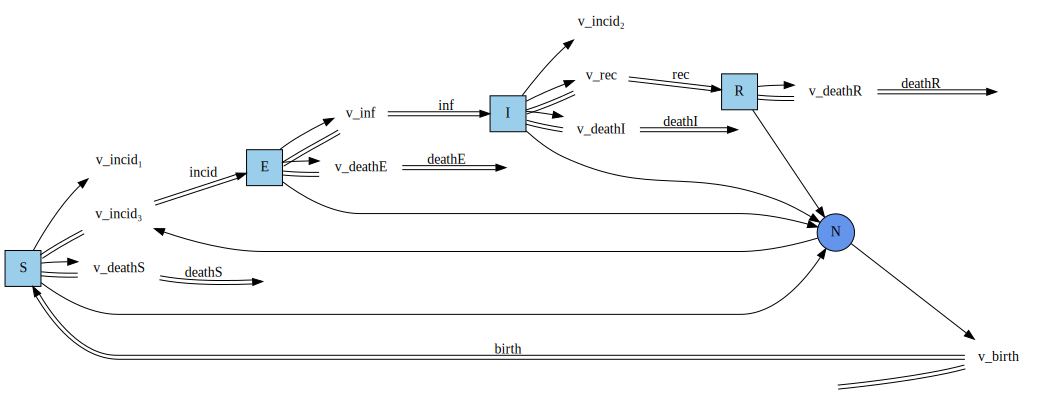

In [22]:
Graph(seir)

# 2. Convert the Stock and Flow diagram to Causal Loop diagram

In [23]:
seir_causalLoop=convertToCausalLoop(seir)

E,s,t
1,1,13
2,2,13
3,3,13
4,4,13
5,13,5
6,13,6
7,1,14
8,3,15
9,1,7
10,2,8


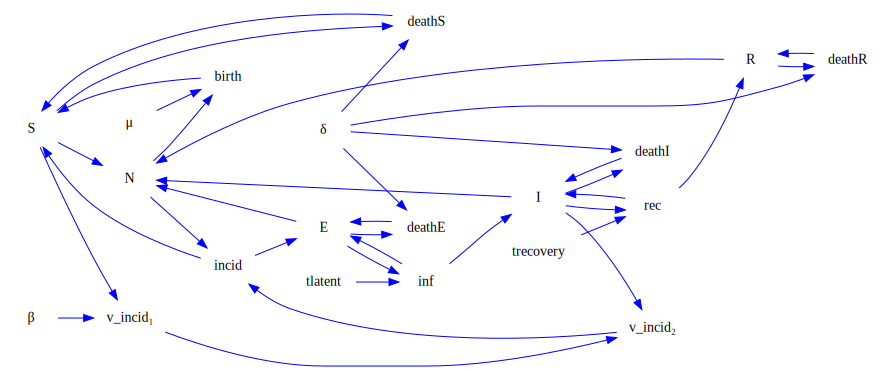

In [24]:
Graph(seir_causalLoop)